<a href="https://colab.research.google.com/github/MuthuJawahar1108/Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**1.Install Dependencies and import libraries**




In [ ]:
# !pip install pillow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image
import os


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**2. Collecting and cleaning data**

In [ ]:
IMAGE_SIZE = 240
BATCH_SIZE = 32

In [ ]:
# classes = []
# parent_directory = "/content/drive/MyDrive/MedicinalPlantsDetection/training"

# for filename in os.listdir(parent_directory):
#     classes.append(filename)



# for i in range(len(classes)):

#     directory = f"/content/drive/MyDrive/MedicinalPlantsDetection/training/{classes[i]}"

#     for filename in os.listdir(directory):
#         if filename.endswith(".png"):
#             img = Image.open(os.path.join(directory,filename))


#     #webp  has an RGBA mode, which stands for Red, Green, Blue, and Alpha (transparency). JPEG format does not support alpha channels, so you need to convert the image to RGB mode before saving it as a JPEG.
#             if img.mode != 'RGB':
#                 img = img.convert('RGB')

#             new_filename = os.path.splitext(filename)[0]+".jpg"
#             # os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
#             img.save(os.path.join(directory,new_filename),"JPEG")
#             os.remove(os.path.join(directory,filename))


In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/MedicinalPlantsDetection/Converted",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2750 files belonging to 5 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Adathodai', 'Aloevera', 'Bringaraja', 'Lemon', 'Neem']

In [ ]:
len(dataset)

86

In [ ]:
2750/32


85.9375

In [ ]:

# classes = []
# parent_directory = "/content/drive/MyDrive/MedicinalPlantsDetection/training"

# for filename in os.listdir(parent_directory):
#     classes.append(filename)

# for i in range(len(classes)):

#     directory = f"/content/drive/MyDrive/MedicinalPlantsDetection/training/{classes[i]}"

#     # Iterate through each file in the directory
#     for filename in os.listdir(directory):
#         if filename.endswith(".jpg"):
#             # Construct the new filename with .jpeg extension
#             new_filename = os.path.splitext(filename)[0] + ".jpeg"

#             # Rename the file
#             os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))



In [ ]:
# classes = []
# parent_directory = "/content/drive/MyDrive/MedicinalPlantsDetection/training"

# for filename in os.listdir(parent_directory):
#     classes.append(filename)

# for i in range(len(classes)):

#     directory = f"/content/drive/MyDrive/MedicinalPlantsDetection/training/{classes[i]}"

#     # Sort the filenames in the directory
#     files = sorted(os.listdir(directory))

#     # Define the starting index for renaming
#     index = 101

#     # Iterate through each file in the directory
#     for filename in files:
#         new_filename = f"img_{index}.jpeg"  # Change the extension according to your file type
#         os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
#         index += 1


In [ ]:
# for image_batch, label_batch in dataset:
#     if tf.reduce_any(tf.math.is_nan(image_batch)) or tf.reduce_any(tf.math.is_inf(image_batch)):
#         print("NaN or infinite values found in the image batch")

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 240, 240, 3)
[2 3 1 4 2 0 3 3 3 1 3 0 2 1 1 0 1 3 0 1 0 4 1 0 3 4 0 3 4 0 0 2]


In [ ]:
dataset.element_spec


(TensorSpec(shape=(None, 240, 240, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)
    print(label_batch.numpy()[0])

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
4


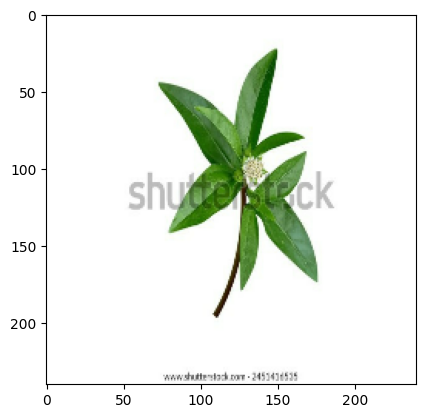

In [ ]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy()/255.0)

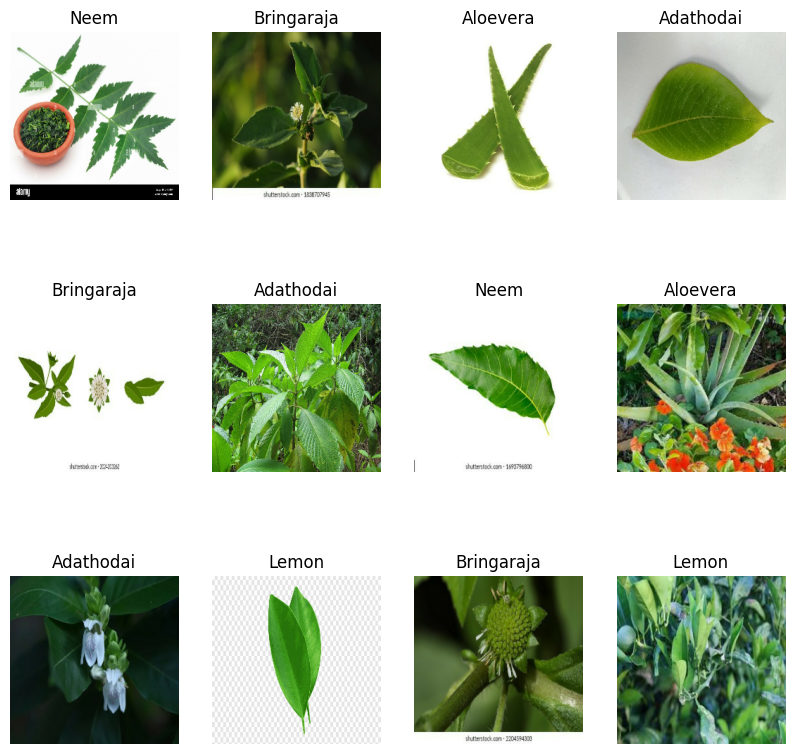

In [ ]:
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [ ]:
len(dataset)

86

In [ ]:
# 80% - training
# 20% - 10%(Validation) + 10%(testing)

In [ ]:
train_size = 0.7
len(dataset) * train_size

60.199999999999996

In [ ]:
train_ds = dataset.take(int(len(dataset)*train_size))
len(train_ds)

60

In [ ]:

rem_ds = dataset.skip(int(len(dataset)*train_size))
len(rem_ds)

26

In [ ]:
val_size = 0.15
len(dataset)*val_size

12.9

In [ ]:
val_ds = rem_ds.take(int(len(dataset)*val_size))
len(val_ds)

12

In [ ]:
test_ds = rem_ds.skip(int(len(dataset)*val_size))
len(test_ds)

14

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


**Image Preprocessing**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

**Data Augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

**Model Building**

In [ ]:
CHANNELS = 3
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation="softmax")
])

model.build(input_shape=input_shape)

In [ ]:
# CHANNELS = 3
# input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
# n_classes = 3


# model = models.Sequential([

#     resize_and_rescale,
#     data_augmentation,

#     #Convolution Layer
#     layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(128,kernel_size=(3,3),activation="relu"),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(256,kernel_size=(3,3),activation="relu"),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(512,kernel_size=(3,3),activation="relu"),
#     layers.MaxPooling2D((2,2)),


#     #Dense Layer
#     layers.Flatten(),
#     layers.Dense(128,activation="relu"),


#     layers.Dense(n_classes,activation="softmax")

# ])

# model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 240, 240, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 240, 240, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 238, 238, 32)        896       
                                                                 
 batch_normalization (BatchN  (32, 238, 238, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (32, 119, 119, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 117, 117, 64)       

In [ ]:
# model = tf.keras.models.load_model("/content/drive/MyDrive/Models/MiniProject/1/",compile=False)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback to save the model weights
checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)


In [ ]:
# Train the model with the checkpoint callback
history = model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    callbacks=[checkpoint_callback]  # Pass the checkpoint callback
)

Epoch 1/50
60/60 [==============================] - 887s 10s/step - loss: 1.9361 - accuracy: 0.3333 - val_loss: 2.2264 - val_accuracy: 0.2344
Epoch 2/50
60/60 [==============================] - 517s 9s/step - loss: 1.6117 - accuracy: 0.4005 - val_loss: 2.4626 - val_accuracy: 0.2057
Epoch 3/50
60/60 [==============================] - 519s 9s/step - loss: 1.4665 - accuracy: 0.4406 - val_loss: 2.6854 - val_accuracy: 0.1953
Epoch 4/50
60/60 [==============================] - 522s 9s/step - loss: 1.3678 - accuracy: 0.4625 - val_loss: 1.8261 - val_accuracy: 0.3151
Epoch 5/50
60/60 [==============================] - 525s 9s/step - loss: 1.3476 - accuracy: 0.4760 - val_loss: 1.9156 - val_accuracy: 0.2734
Epoch 6/50
60/60 [==============================] - 525s 9s/step - loss: 1.2980 - accuracy: 0.4833 - val_loss: 1.6219 - val_accuracy: 0.3307
Epoch 7/50
60/60 [==============================] - 521s 9s/step - loss: 1.2409 - accuracy: 0.5177 - val_loss: 1.6484 - val_accuracy: 0.3307
Epoch 8/50
6

In [ ]:
# EPOCHS = 30

# history = model.fit(
#     train_ds,
#     epochs = EPOCHS,
#     batch_size = BATCH_SIZE,
#     verbose = 1,
#     validation_data = val_ds
# )

In [ ]:
# # Load the model
# model.load_weights('model_checkpoint.h5')

# # Continue training
# history = model.fit(
#     train_ds,
#     epochs=30,  # Increase the number of epochs
#     batch_size=BATCH_SIZE,
#     verbose=1,
#     validation_data=val_ds,
#     callbacks=[checkpoint_callback]  # Pass the checkpoint callback
# )


In [ ]:
history.params


In [ ]:
history.history.keys()

In [ ]:

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].plot(history.history["loss"],color="teal",label="loss")
ax[0].plot(history.history["val_loss"],color="orange",label="val_loss")
ax[0].title.set_text("Loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"],color="teal",label="accuracy")
ax[1].plot(history.history["val_accuracy"],color="orange",label="val_accuracy")
ax[1].title.set_text("Accuracy")
ax[1].legend()

In [ ]:

model_version=1
model.save(f"/content/drive/MyDrive/Models/MiniProject/{model_version}")
model.save("/content/drive/MyDrive/Models/MiniProject/medicinal.keras")
model.save("/content/drive/MyDrive/Models/MiniProject/med_final.h5")

In [ ]:
# import numpy as np

# for images_batch , labels_batch in test_ds.take(1):
#     first_image = images_batch[0].numpy().astype("uint8")
#     first_label = labels_batch[0].numpy()

#     print("First image to predict")
#     plt.imshow(first_image)
#     print("First image's actual label: ",class_names[first_label])

#     batch_prediction = model.predict(images_batch) #Prediction for 32 images
#     print("Predicted_label: ",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0) #Create a branch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class,confidence

In [ ]:

import numpy as np

plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))


        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i].numpy()]

        plt.title(f"Actual_label : {actual_class}\nPredicted_label : {predicted_class}\nConfidence : {confidence} ")
        plt.axis("off")



In [ ]:
# import matplotlib.pyplot as plt
# from PIL import Image
# import numpy as np
# import tensorflow as tf

# # Load the saved model
# model = tf.keras.models.load_model("/content/drive/MyDrive/Models/MiniProject/med_final.h5")

# # Load and preprocess the image
# image_path = "2.jpg"
# img = Image.open(image_path)
# img = img.resize((240, 240))  # Resize to match model input size
# img_array = np.expand_dims(np.array(img), axis=0)
# img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

# # Make predictions
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions)
# confidence = np.max(predictions)

# # Display the image and predictions
# plt.figure(figsize=(8, 8))
# plt.imshow(img)
# plt.title(f"Predicted label: {predicted_class}\nConfidence: {confidence}")
# plt.axis("off")
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from PIL import Image
# import numpy as np
# import tensorflow as tf
# from keras.losses import SparseCategoricalCrossentropy

# # Define the custom loss function
# custom_loss = SparseCategoricalCrossentropy()

# # Load the saved model
# model = tf.keras.models.load_model("med_final.h5", custom_objects={"SparseCategoricalCrossentropy": custom_loss})

# # Load and preprocess the image
# image_path = "11.jpg"
# img = Image.open(image_path)
# img = img.resize((240, 240))  # Resize to match model input size
# img_array = np.expand_dims(np.array(img), axis=0)
# img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

# # Make predictions
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions)
# confidence = np.max(predictions)

# # Display the image and predictions
# plt.figure(figsize=(8, 8))
# plt.imshow(img)
# plt.title(f"Predicted label: {predicted_class}\nConfidence: {confidence}")
# plt.axis("off")
# plt.show()
